In [ ]:
!pip install keras -q

In [ ]:
!pip install tensorflow -q

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from sklearn import svm

from sklearn.metrics import accuracy_score

# load the dataset (mnist digit data)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flattening the Data (images0

In [ ]:
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

# Scale the data

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the SVM (linear)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train[:10000], y_train[:10000])

SVC(kernel='linear')

# Evaluate

In [ ]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9128


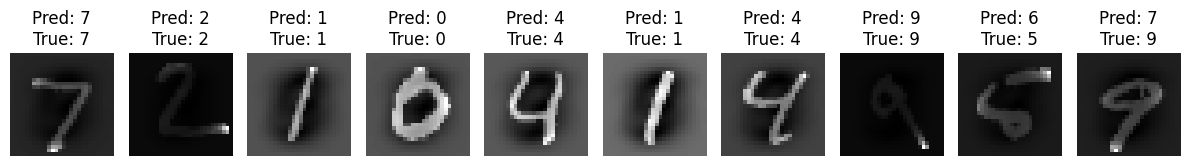

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick first 10 images from the test set
num_samples = 10
images = x_test[:num_samples]
true_labels = y_test[:num_samples]

# Predict using the trained model
pred_labels = clf.predict(images)

# Plot images with predictions
plt.figure(figsize=(12, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


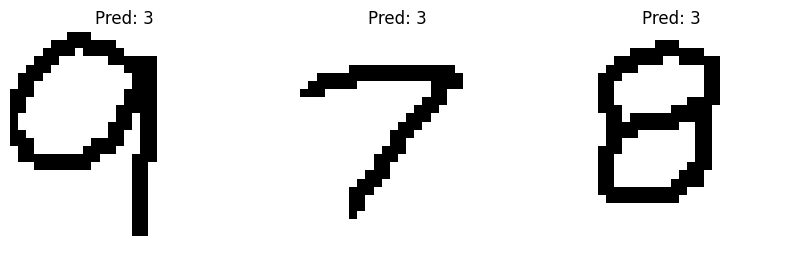

In [ ]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path where your images are stored in Colab
image_folder = "/content/*.png"  # change to .jpg if needed

# Collect all image file paths
image_paths = glob.glob(image_folder)

predictions = []
images_data = []

for path in image_paths:
    # Load and preprocess
    img = Image.open(path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)

    # Always invert to match MNIST's black background, white digit
    img_array = 255 - img_array

    # Invert if background is black
    if img_array.mean() < 128:
        img_array = 255 - img_array

    # Flatten & scale
    img_flat = img_array.reshape(1, -1)
    img_scaled = scaler.transform(img_flat)

    # Predict
    pred = clf.predict(img_scaled)[0]

    predictions.append(pred)
    images_data.append((path, img_array))

# Display
plt.figure(figsize=(10, 3))
for i, (path, img_array) in enumerate(images_data):
    plt.subplot(1, len(images_data), i + 1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()


# Using RBF kernel SVM

In [ ]:
# gamma => controls curve flexibility
# C => controls margin hardiness
clf_rbf = svm.SVC(kernel="rbf", gamma=0.05, C=5)
clf_rbf.fit(x_train[:5000], y_train[:5000]) # -> subset for speed

SVC(C=5, gamma=0.05)

In [ ]:
# Test accuracy
rbf_pred = clf_rbf.predict(x_test)
print(f"MNIST Test Accuracy: {accuracy_score(y_test, rbf_pred):.4f}")

MNIST Test Accuracy: 0.2038


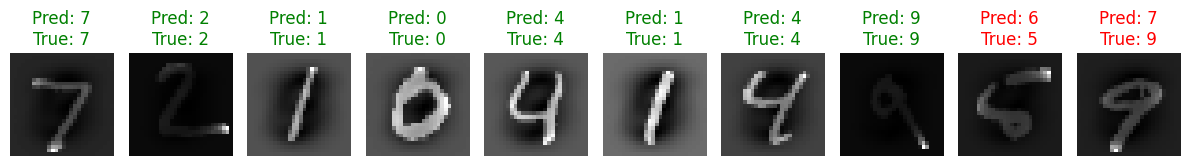

In [ ]:
# Pick first 10 test images for display
num_samples = 10
sample_images = x_test[:num_samples]
true_labels = y_test[:num_samples]
pred_labels = clf.predict(sample_images)

# Plot
plt.figure(figsize=(12, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    color = 'green' if pred_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {true_labels[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


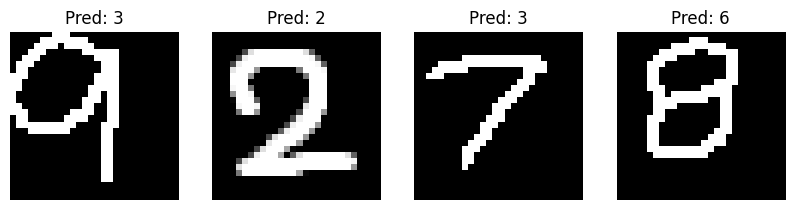

In [ ]:
# 3️⃣ Predict all images from your uploaded files section
# Change folder path according to your files location
image_folder = "/content/*.png"  # or /content/images/*.png if inside folder
image_paths = glob.glob(image_folder)

predictions = []
images_data = []

for path in image_paths:
    img = Image.open(path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)

    # Detect background & invert if needed
    if img_array.mean() > 127:
        img_array = 255 - img_array

    # Flatten & scale
    img_flat = img_array.reshape(1, -1)
    img_scaled = scaler.transform(img_flat)

    # Predict
    pred = clf.predict(img_scaled)[0]
    predictions.append(pred)
    images_data.append((path, img_array))

# 4️⃣ Display results
plt.figure(figsize=(10, 3))
for i, (path, img_array) in enumerate(images_data):
    plt.subplot(1, len(images_data), i + 1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()

# Train RBF SVM with tuned params

In [ ]:
clf_rbf2 = svm.SVC(kernel='rbf', gamma=0.005, C=10)
clf_rbf2.fit(x_train[:20000], y_train[:20000])  # Larger subset

SVC(C=10, gamma=0.005)

# Test accuracy

In [ ]:
y_pred_rbf2 = clf_rbf2.predict(x_test)
print(f"MNIST Test Accuracy: {accuracy_score(y_test, y_pred_rbf2):.4f}")

MNIST Test Accuracy: 0.9278


Why these values?

    gamma=0.005 → avoids overfitting on high-dimensional pixel data

    C=10 → allows some margin flexibility but penalizes errors more than default (C=1)

    20,000 samples → gives the SVM much more variety in digit styles

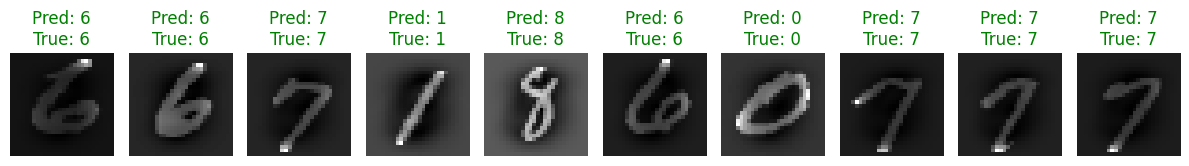

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick first 10 images from the test set
num_samples = 10
images = x_test[::-10]
true_labels = y_test[::-10]

# Predict using the trained model
pred_labels = clf_rbf2.predict(images)

# Plot images with predictions
plt.figure(figsize=(12, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    color = 'green' if pred_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {true_labels[i]}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

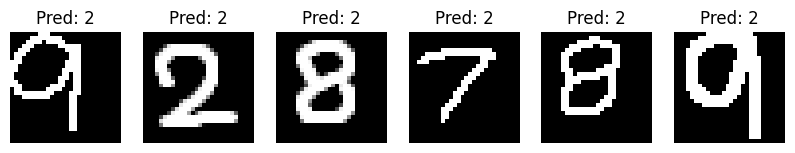

In [ ]:
# 3️⃣ Predict all images from your uploaded files section

image_folder = "/content/*.png"  # or /content/images/*.png if inside folder
image_paths = glob.glob(image_folder)

predictions = []
images_data = []

for path in image_paths:
    img = Image.open(path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)

    # Detect background & invert if needed
    if img_array.mean() > 127:
        img_array = 255 - img_array

    # Flatten & scale
    img_flat = img_array.reshape(1, -1)
    img_scaled = scaler.transform(img_flat)

    # Predict
    pred = clf_rbf2.predict(img_scaled)[0]
    predictions.append(pred)
    images_data.append((path, img_array))

# 4️⃣ Display results
plt.figure(figsize=(10, 3))
for i, (path, img_array) in enumerate(images_data):
    plt.subplot(1, len(images_data), i + 1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()

# SVM with `Poly` Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

# Scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Use a smaller subset for tuning (GridSearch on full MNIST would be too slow)
train_subset = 8000
x_train_sub = x_train[:train_subset]
y_train_sub = y_train[:train_subset]

# Apply GridSearch Cross-Validation

In [ ]:
# Define the parameter grid for polynomial kernel
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Initialize the SVM model with polynomial kernel
svc_poly = svm.SVC(kernel='poly')

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(svc_poly,
                           param_grid,
                           cv=3,
                           n_jobs=-2,
                           verbose=2)

grid_search.fit(x_train_sub, y_train_sub)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=  34.5s
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=  33.0s
[CV] END .......................C=0.1, degree=2, gamma=scale; total time=  28.7s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=  23.1s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=  22.2s
[CV] END ........................C=0.1, degree=2, gamma=auto; total time=  22.8s
[CV] END .......................C=0.1, degree=3, gamma=scale; total time=  22.7s
[CV] END .......................C=0.1, degree=3, gamma=scale; total time=  23.9s
[CV] END .......................C=0.1, degree=3, gamma=scale; total time=  23.4s
[CV] END ........................C=0.1, degree=3, gamma=auto; total time=  23.8s
[CV] END ........................C=0.1, degree=3, gamma=auto; total time=  25.2s
[CV] END ........................C=0.1, degree=3

GridSearchCV(cv=3, estimator=SVC(kernel='poly'), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto']},
             verbose=2)

In [ ]:

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Poly Kernel: {acc:.4f}")


Best parameters found: {'C': 10, 'degree': 2, 'gamma': 'scale'}
Test Accuracy with Poly Kernel: 0.9484


# SGD-based SVM

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:

# SGD-based SVM with polynomial kernel approximation
sgd_svm = SGDClassifier(
    loss="hinge",             # SVM hinge loss
    penalty="l2",             # Regularization
    alpha=1e-4,               # Learning rate regularization term
    max_iter=1000,            # Max iterations over data
    tol=1e-3,                 # Tolerance for stopping
    early_stopping=True,      # Enable early stopping
    n_iter_no_change=5,       # Stop if no improvement
    random_state=42
)

In [ ]:
# Train
sgd_svm.fit(x_train, y_train)

SGDClassifier(early_stopping=True, random_state=42)

In [ ]:
# Predict
y_pred = sgd_svm.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SGD-based Poly approx): {acc:.4f}")

Test Accuracy (SGD-based Poly approx): 0.9137


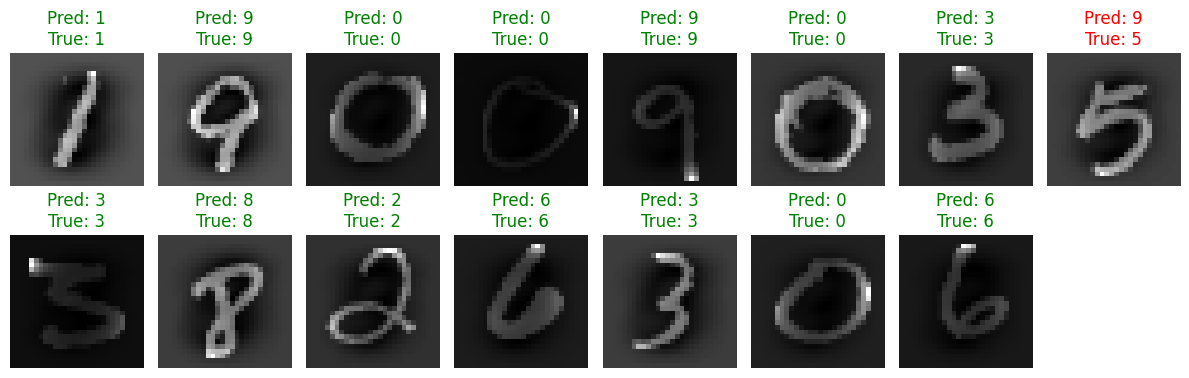

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly select 15 test images
indices = np.random.choice(len(x_test), 15, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]
sample_preds = sgd_svm.predict(sample_images)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 8, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    # This single line correctly determines the color
    color = 'green' if sample_preds[i] == sample_labels[i] else 'red'
    plt.title(f"Pred: {sample_preds[i]}\nTrue: {sample_labels[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


# Cross Validation on SVM with RBF Kernel

In [ ]:
# Parameter grid
param_grid = {
    'C': [1, 5, 10],
    'gamma': [0.001, 0.005, 0.01]
}

# GridSearch with 3-fold CV
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(x_train_sub, y_train_sub)

print("Best parameters:", grid.best_params_)

# Train best model on larger dataset
best_svm = svm.SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
best_svm.fit(x_train[:20000], y_train[:20000])

# Evaluate
y_pred = best_svm.predict(x_test)
print(f"MNIST Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'C': 10, 'gamma': 0.001}
MNIST Test Accuracy: 0.9604


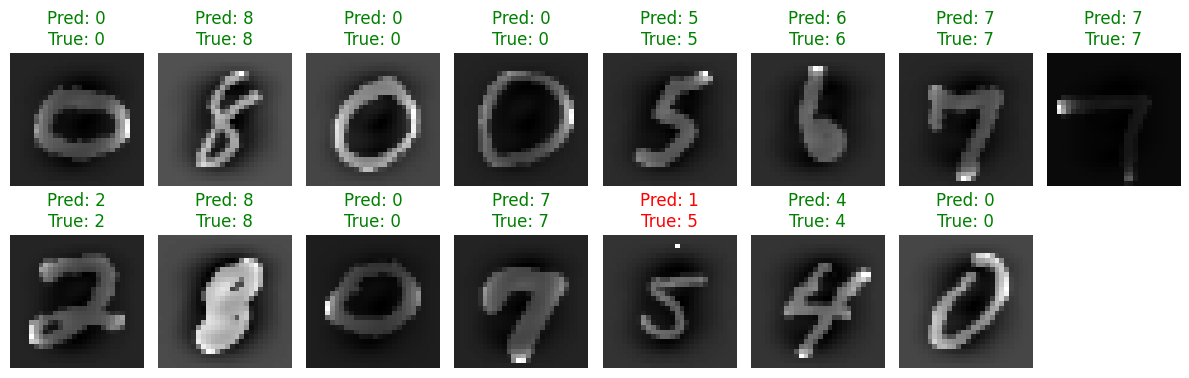

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly select 15 test images
indices = np.random.choice(len(x_test), 15, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]
sample_preds = best_svm.predict(sample_images)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 8, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    color = 'green' if sample_preds[i] == sample_labels[i] else 'red'
    color = 'green' if pred_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {sample_preds[i]}\nTrue: {sample_labels[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


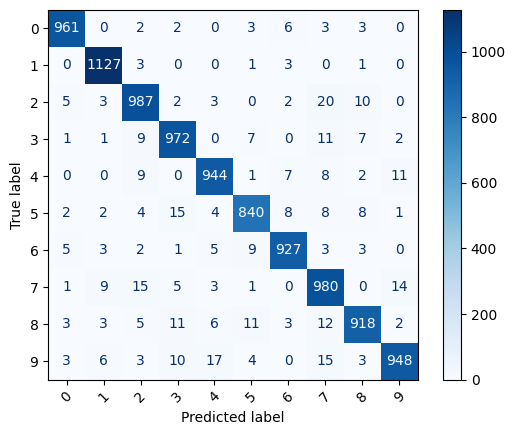

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_full = best_svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()


In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def predict_and_show_images(image_folder, scaler, best_svm):
    """
    Predicts labels for all PNG images in a folder using the trained SVM model.

    Parameters:
        image_folder (str): Path pattern to PNG images, e.g., '/content/*.png'
        scaler: Fitted scaler object (e.g., StandardScaler)
        best_svm: Trained SVM model

    Returns:
        list: Predictions for each image
    """
    image_paths = glob.glob(image_folder)
    predictions = []
    images_data = []

    for path in image_paths:
        img = Image.open(path).convert('L')
        img = img.resize((28, 28))
        img_array = np.array(img)

        # Invert if background is white
        if img_array.mean() > 127:
            img_array = 255 - img_array

        img_flat = img_array.reshape(1, -1)
        img_scaled = scaler.transform(img_flat)
        pred = best_svm.predict(img_scaled)[0]

        predictions.append(pred)
        images_data.append((path, img_array))

    # Plot predictions
    plt.figure(figsize=(10, 3))
    for i, (path, img_array) in enumerate(images_data):
        plt.subplot(1, len(images_data), i + 1)
        plt.imshow(img_array, cmap='gray')
        plt.title(f"Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

    return predictions


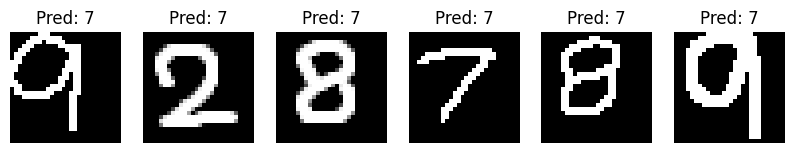

[np.uint8(7), np.uint8(7), np.uint8(7), np.uint8(7), np.uint8(7), np.uint8(7)]

In [ ]:
predict_and_show_images("/content/*.png", scaler, clf_rbf)

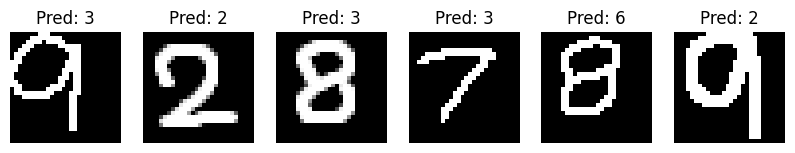

[np.uint8(3), np.uint8(2), np.uint8(3), np.uint8(3), np.uint8(6), np.uint8(2)]

In [ ]:
predict_and_show_images("/content/*.png", scaler, clf)

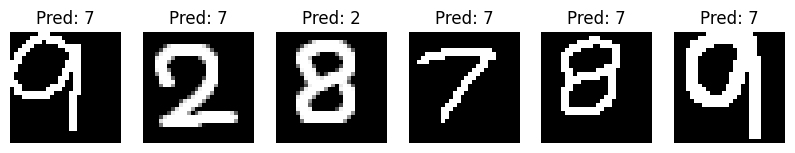

Predictions: [np.uint8(7), np.uint8(7), np.uint8(2), np.uint8(7), np.uint8(7), np.uint8(7)]


In [ ]:
preds = predict_and_show_images("/content/*.png", scaler, best_svm)
print("Predictions:", preds)


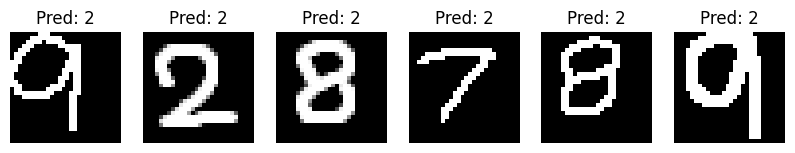

[np.uint8(2), np.uint8(2), np.uint8(2), np.uint8(2), np.uint8(2), np.uint8(2)]

In [ ]:
predict_and_show_images("/content/*.png", scaler, clf_rbf2)

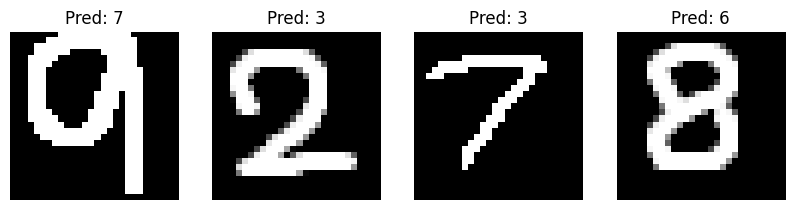

Predictions: [np.uint8(7), np.uint8(3), np.uint8(3), np.uint8(6)]


In [ ]:
preds = predict_and_show_images("/content/*.png", scaler, sgd_svm)
print("Predictions:", preds)


# Since the Accuracy of the SVM with rbf kernel is High I will save `best_svm`

In [ ]:
import joblib

# Save model and scaler
joblib.dump(best_svm, "best_svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")



In [ ]:
from google.colab import files
files.download("best_svm_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install --upgrade gradio scikit-learn joblib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 100.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [ ]:
# Load later
best_svm = joblib.load("best_svm_model.pkl")
scaler = joblib.load("scaler.pkl")


In [ ]:
# app.py - A Gradio Handwritten Digit Classifier for Google Colab
# This version adds a dedicated 'Clear' button.

import numpy as np
import gradio as gr
from PIL import Image, ImageOps

# --- 1. Load the Pre-trained SVC Model and Scaler ---
# Make sure your trained model and scaler files are in the same directory.
try:
    best_svm = joblib.load("best_svm_model.pkl")
    scaler = joblib.load("scaler.pkl")
    print("Model and scaler loaded successfully.")
except FileNotFoundError as e:
    # This is a critical error, so we'll stop the app and print the reason.
    print(f"Error: A required file was not found: {e.filename}. Please ensure 'best_svm_model.pkl' and 'scaler.pkl' are in the same directory as this script.")
    # Set variables to None so the app can't run without them
    best_svm = None
    scaler = None

# --- 2. Define the Preprocessing and Prediction Function ---
def process_sketchpad(image):
    """
    Preprocesses the input image from Gradio and predicts the digit.

    Args:
        image (dict or np.ndarray): The input from the Gradio Sketchpad.

    Returns:
        dict: A dictionary of prediction scores for each digit.
    """
    # Fix for the AttributeError: 'dict' object has no attribute 'astype'
    if isinstance(image, dict):
        image = image.get('composite')

    # Check if the image is valid (e.g., if the sketchpad is empty)
    if image is None or np.all(image == 0):
        # Return a dictionary with all zeros if the sketchpad is empty
        return {str(i): 0.0 for i in range(10)}

    # Convert the 28x28x4 numpy array to a grayscale PIL image
    pil_image = Image.fromarray(image.astype(np.uint8), 'RGBA').convert('L')

    # Invert colors to match the MNIST dataset (white digit on black background)
    pil_image = ImageOps.invert(pil_image)

    # Resize to 28x28 pixels and convert to a numpy array
    img_array = np.array(pil_image.resize((28, 28)))

    # Flatten the image to a 1D array of shape (1, 784) for the model
    img_flattened = img_array.reshape(1, -1)

    # Scale the image data using the pre-fitted scaler
    img_scaled = scaler.transform(img_flattened)

    # Predict the digit
    pred = best_svm.predict(img_scaled)[0]

    # Get confidence scores using decision_function
    decision_scores = best_svm.decision_function(img_scaled)[0]

    # Create a dictionary of labels and scores for Gradio Label output
    labels = [str(i) for i in range(10)]
    scores = dict(zip(labels, decision_scores))

    return scores

# --- 3. Set up the Gradio Interface with Blocks ---
with gr.Blocks(title="Handwritten Digit Classifier") as demo:
    gr.Markdown(
        """
        ## ✍️ Handwritten Digit Classifier
        Draw a digit in the sketchpad below, then click **Submit** to see the prediction or **Clear** to start over.
        """
    )
    with gr.Row():
        with gr.Column():
            sketchpad = gr.Sketchpad(label="Draw a digit here")
        with gr.Column():
            output_label = gr.Label(num_top_classes=1, label="Prediction")

    with gr.Row():
        # Create a submit button
        submit_btn = gr.Button("✨ Submit for Prediction")
        # Create a clear button
        clear_btn = gr.Button("🗑️ Clear")

    # The submit button will trigger the prediction function
    submit_btn.click(fn=process_sketchpad, inputs=sketchpad, outputs=output_label)

    # The clear button will reset the sketchpad and the label
    clear_btn.click(fn=lambda: (None, {str(i): 0.0 for i in range(10)}), inputs=[], outputs=[sketchpad, output_label])

# --- 4. Launch the Gradio App ---
if __name__ == "__main__":
    demo.launch(debug=True)


Model and scaler loaded successfully.
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://840df477d7dbd8b46c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/tmp/ipython-input-2476452622.py:42: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_image = Image.fromarray(image.astype(np.uint8), 'RGBA').convert('L')
/tmp/ipython-input-2476452622.py:42: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_image = Image.fromarray(image.astype(np.uint8), 'RGBA').convert('L')
/tmp/ipython-input-2476452622.py:42: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_image = Image.fromarray(image.astype(np.uint8), 'RGBA').convert('L')
/tmp/ipython-input-2476452622.py:42: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_image = Image.fromarray(image.astype(np.uint8), 'RGBA').convert('L')
/tmp/ipython-input-2476452622.py:42: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_image = Image.fromarray(

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://840df477d7dbd8b46c.gradio.live
